Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [ ]:
# Загружаем библиотеки
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Загружаем файл HR.csv в pandas dataframe

data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

data.describe() # Расчет среднего, стандартного отклонения, мин/макс значения

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Расчет медианы

data['satisfaction_level'].median()

In [ ]:
data['last_evaluation'].median()

In [ ]:
data['number_project'].median()

In [ ]:
data['average_montly_hours'].median()

In [ ]:
data['time_spend_company'].median()

In [ ]:
data['Work_accident'].median()

In [ ]:
data['left'].median()

In [ ]:
data['promotion_last_5years'].median()

In [ ]:
# Расчет моды
data['satisfaction_level'].mode()

In [ ]:
data['last_evaluation'].mode()

In [ ]:
data['number_project'].median()

In [ ]:
data['average_montly_hours'].mode()

In [ ]:
data['time_spend_company'].mode()

In [ ]:
data['Work_accident'].mode()

In [ ]:
data['left'].mode()

In [ ]:
data['promotion_last_5years'].mode()

Рассчет и визуализация корреляционной матрицы для
количественных переменных.

Определение двух самых скоррелированных и двух наименее
скоррелированных переменных

In [ ]:
# Посчитаем коэффициенты корреляции между всеми показателями
data.corr().round(3)

<ipython-input-26-c911ed1a6dcc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().round(3)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000,0.105,-0.143,-0.020,-0.101,0.059,-0.388,0.026
last_evaluation,0.105,1.000,0.349,0.340,0.132,-0.007,0.007,-0.009
number_project,-0.143,0.349,1.000,0.417,0.197,-0.005,0.024,-0.006
average_montly_hours,-0.020,0.340,0.417,1.000,0.128,-0.010,0.071,-0.004
time_spend_company,-0.101,0.132,0.197,0.128,1.000,0.002,0.145,0.067
Work_accident,0.059,-0.007,-0.005,-0.010,0.002,1.000,-0.155,0.039
left,-0.388,0.007,0.024,0.071,0.145,-0.155,1.000,-0.062
promotion_last_5years,0.026,-0.009,-0.006,-0.004,0.067,0.039,-0.062,1.000


In [ ]:
# Визуализируем матрицу с помощью параметров стиля
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-23-c628e01b825f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Из матрицы видно, что наиболее скореллированные переменные - это прямая зависимость количества проектов, выполненных за время работы от среднего количество часов на рабочем месте в месяц, имеющая коэффициент 0.417 и обратная зависимость уровня удовлетворенности работой сотрудника и его увольнением с коэффициентом -0.388.

Наименее скоррелированные переменные - зависимость стажа работы в компании и количества несчастных случаев (коэффициент 0.002) и связь среднемесячного количества часов на рабочем месте с повышением сотрудника за последние 5 лет (коэффициент -0.0035)

In [ ]:
# Рассчет количества сотрудников в каждом департаменте
# Для категориальных переменных используем метод value_counts

data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [ ]:
# Распределение сотрудников по зарплатам
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [ ]:
# Распределение сотрудников по зарплатам в каждом департаменте по отдельности
data.groupby('department')['salary'].value_counts()

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

<Axes: xlabel='department'>

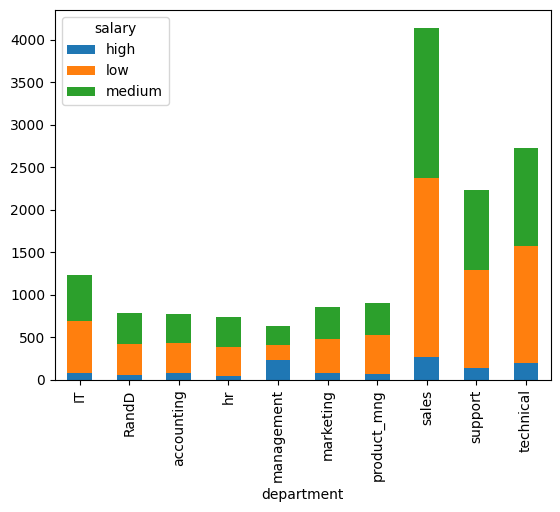

In [ ]:
# Визуализация распределения сотрудников по зарплатам в каждом департаменте
data.groupby(['department', 'salary']).size().unstack().plot(kind='bar', stacked=True)

Проверяем гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [ ]:
# Определяем среднемечное количество времени за работой сотрудников с высоким доходом
data_high = data[(data['salary'] == 'high')]['average_montly_hours']
data_high.mean()


199.86742118027485

In [ ]:
# Определяем среднемечное количество времени за работой сотрудников с низким доходом
data_low = data[(data['salary'] == 'low')]['average_montly_hours']
data_low.mean()

200.9965828321487

проведем двухвыборочный t-тест:

H0: среднемесячное количество часов проведенное на работе сотрудниками с высоким окладом и сотрудниками с низким окладом равны, H1: среднемесячное количество часов проведенное на работе сотрудниками с высоким окладом и сотрудниками с низким окладом не равны

In [ ]:
t_stat, p = stats.ttest_ind(data_high, data_low)

print(t_stat, p)

-0.7288680398062308 0.4661023478267259


Так как p-value больше уровня значимости 0.05, мы не отвергаем нулевую гипотезу и делаем вывод что сотрудники с высоким окладом проводят на работе в среднем столько же времени, сколько и сотрудники с низким окладом.

Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
1. Доля сотрудников с повышением за последние 5 лет
2. Средняя степень удовлетворенности
3. Среднее количество проектов

In [ ]:
# Данные по увольнениям

data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
# Данные по повышениям
data['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [ ]:
# Уволившиеся сотрудники
data_left = data[(data['left'] == 1)]


In [ ]:
# Оставшиеся сотрудники
data_unleft = data[(data['left'] == 0)]

In [ ]:
data_left['promotion_last_5years'].value_counts (normalize = True)*100

0    99.467936
1     0.532064
Name: promotion_last_5years, dtype: float64

Доля сотрудников с повышением за 5 лет среди уволившихся составляет 0.53%

In [ ]:
data_unleft['promotion_last_5years'].value_counts (normalize = True)*100

0    97.374869
1     2.625131
Name: promotion_last_5years, dtype: float64

Доля сотрудников с повышением за 5 лет среди оставшихся составляет 2.62 %

In [ ]:
# Средняя степень удовлетворенности работой уволившихся сотрудников
data_left['satisfaction_level'].mean()

0.4400980117614114

In [ ]:
# Средняя степень удовлетворенности работой оставшихся сотрудников
data_unleft['satisfaction_level'].mean()

0.666809590479524

In [ ]:
# Среднее количество выполненных проектов среди уволившихся сотрудников
data_left['number_project'].mean()

3.8555026603192384

In [ ]:
# Среднее количество выполненных проектов среди оставшихся сотрудников
data_unleft['number_project'].mean()

3.786664333216661

Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)

In [ ]:
# Импортируем библиотеку
import sklearn


In [ ]:
data_lda = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]


In [ ]:
data_class = data['left']


In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_lda, data_class, random_state=40)

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [ ]:
result

,left,Unnamed 0
8034,0.0,NaN
11511,0.0,NaN
10507,0.0,NaN
10228,0.0,NaN
1039,1.0,0.0
...,...,...
14931,1.0,NaN
13829,0.0,NaN
5723,0.0,NaN
4700,0.0,NaN


In [ ]:
# Оценим качество модели метрикой точности
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

0.7608

С учетом имеющихся данных, модель, предсказывающая увольнение сотрудника имеет точность 76% на тестовой выборке.